In [361]:
import pandas as pd
#from ReliefF import ReliefF
import sklearn_relief as relieff
import numpy as np
import matplotlib.pyplot as plt

Večino spodnjega je obdelava za relif, ker sem poskušal najti najboljše atribute za predvidevanje nesreč

In [362]:
data20 = pd.read_csv('./Podatki/pn2020.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
data19= pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#odkomenteri za boljše rezultated od relif-a
# data18= pd.read_csv('./Podatki/pn2018.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data17= pd.read_csv('./Podatki/pn2017.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data16= pd.read_csv('./Podatki/pn2016.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data15= pd.read_csv('./Podatki/pn2015.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data14= pd.read_csv('./Podatki/pn2014.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data13= pd.read_csv('./Podatki/pn2013.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data12= pd.read_csv('./Podatki/pn2012.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data11= pd.read_csv('./Podatki/pn2011.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data10= pd.read_csv('./Podatki/pn2010.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data9= pd.read_csv('./Podatki/pn2009.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#data = pd.concat([data20,data19,data18,data17,data16,data15,data14,data13,data12,data11,data10,data9])
data = pd.concat([data20,data19])
clean_data=data

In [363]:
#data.dropna()
data.pop("ZaporednaStevilkaPN")
data.pop("UraPN")
data['DatumPN'] = pd.DatetimeIndex(data['DatumPN']).month
data

,KlasifikacijaNesrece,UpravnaEnotaStoritve,DatumPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,SifraOdsekaUlice,TekstOdsekaUlice,...,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VozniskiStazVLetih,VozniskiStazVMesecih,VrednostAlkotesta,VrednostStrokovnegaPregleda
0,Z MATERIALNO ŠKODO,NOVA GORICA,2,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,37075,NOVA GORICA,35,PRVOMAJSKA ULICA,...,ŽENSKI,NOVA GORICA,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,NEZNANO,8,5,",00",",00"
1,Z LAŽJO TELESNO POŠKODBO,SLOVENJ GRADEC,1,NE,CESTA,REGIONALNA CESTA III. REDA,00701,RUTA-PESEK-ROGLA-ZEČE,1430,PESEK-ROGLA-ZEČE,...,MOŠKI,LENART,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,12,9,",00",",00"
2,Z LAŽJO TELESNO POŠKODBO,SLOVENJ GRADEC,1,NE,CESTA,REGIONALNA CESTA III. REDA,00701,RUTA-PESEK-ROGLA-ZEČE,1430,PESEK-ROGLA-ZEČE,...,MOŠKI,SLOVENSKA BISTRICA,SLOVENIJA,LAŽJA TELESNA POŠKODBA,PEŠEC,NEZNANO,0,0,",00",",00"
3,Z MATERIALNO ŠKODO,ŽALEC,1,NE,CESTA,REGIONALNA CESTA,00225,MENGEŠ-DUPLICA-ŠENTRUPERT,1246,SOTESKA-ŠENTRUPERT,...,MOŠKI,MOZIRJE,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,16,10,",00",",00"
4,Z MATERIALNO ŠKODO,ŽALEC,1,NE,CESTA,REGIONALNA CESTA,00225,MENGEŠ-DUPLICA-ŠENTRUPERT,1246,SOTESKA-ŠENTRUPERT,...,MOŠKI,MOZIRJE,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,54,11,",00",",00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34156,Z LAŽJO TELESNO POŠKODBO,KOPER,11,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,17042,KOPER,172,CESTA ZORE PERELLO-GODINA,...,MOŠKI,NaN,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,6,8,",00",",00"
34157,Z LAŽJO TELESNO POŠKODBO,KOPER,11,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,17042,KOPER,172,CESTA ZORE PERELLO-GODINA,...,MOŠKI,PIRAN,SLOVENIJA,LAŽJA TELESNA POŠKODBA,VOZNIK MOTORNEGA KOLESA,DA,0,2,",00",",00"
34158,Z LAŽJO TELESNO POŠKODBO,GROSUPLJE,8,DA,NASELJE,NASELJE BREZ ULIČNEGA SISTEMA,09157,ŠENTVID PRI STIČNI,0,NI ODSEKOV,...,MOŠKI,GROSUPLJE,SLOVENIJA,LAŽJA TELESNA POŠKODBA,VOZNIK OSEBNEGA AVTOMOBILA,DA,3,4,",00",",00"
34159,Z LAŽJO TELESNO POŠKODBO,GROSUPLJE,8,DA,NASELJE,NASELJE BREZ ULIČNEGA SISTEMA,09157,ŠENTVID PRI STIČNI,0,NI ODSEKOV,...,ŽENSKI,GROSUPLJE,SLOVENIJA,LAŽJA TELESNA POŠKODBA,POTNIK,DA,0,0,",00",",00"


Podatki za katere hočemo izvedeti kako vplivajo osatli atributi

In [364]:
data["PoskodbaUdelezenca"]=data.PoskodbaUdelezenca.astype('category').cat.codes
# data.pop("PoskodbaUdelezenca")
data.pop("KlasifikacijaNesrece")
data.pop("GeoKoordinataX")
#data.pop("GeoKoordinataY")
#odkomentiraj, če želiš, da odstrani nan vrednosti
data. dropna()
data.pop("ZaporednaStevilkaOsebeVPN")
data.pop("GeoKoordinataY")

0        394895
1        525311
2        525311
3        500711
4        500711
          ...  
34156    400949
34157    400949
34158    488765
34159    488765
34160    488765
Name: GeoKoordinataY, Length: 60234, dtype: int64

Obedlava vseh atributov, ki jih hočemo v številkah

In [ ]:
data['UporabaVarnostnegaPasu']=data.UporabaVarnostnegaPasu.astype('category').cat.codes
data['VrstaUdelezenca']=data.VrstaUdelezenca.astype('category').cat.codes
data['UEStalnegaPrebivalisca']=data.UEStalnegaPrebivalisca.astype('category').cat.codes
data['Spol']=data.Spol.astype('category').cat.codes
data['Drzavljanstvo']=data.Drzavljanstvo.astype('category').cat.codes
data['TekstCesteNaselja']=data.TekstCesteNaselja.astype('category').cat.codes
data['VrstaCesteNaselja']=data.VrstaCesteNaselja.astype('category').cat.codes
data['Lokacija']=data.Lokacija.astype('category').cat.codes
data['VNaselju']=data.VNaselju.astype('category').cat.codes
data['DatumPN']=data.DatumPN.astype('category').cat.codes
data['SifraCesteNaselja']=data.SifraCesteNaselja.astype('category').cat.codes
data['TekstCesteNaselja']=data.TekstCesteNaselja.astype('category').cat.codes
data['TekstOdsekaUlice']=data.TekstOdsekaUlice.astype('category').cat.codes
data['SifraCesteNaselja']=data.SifraCesteNaselja.astype('category').cat.codes
data['SifraOdsekaUlice']=data.SifraOdsekaUlice.astype('category').cat.codes
data['UpravnaEnotaStoritve']=data.UpravnaEnotaStoritve.astype('category').cat.codes
data['VzrokNesrece']=data.VzrokNesrece.astype('category').cat.codes
data['OpisKraja']=data.OpisKraja.astype('category').cat.codes
data['TipNesrece']=data.TipNesrece.astype('category').cat.codes
data['VremenskeOkoliscine']=data.VremenskeOkoliscine.astype('category').cat.codes
data['StanjePrometa']=data.StanjePrometa.astype('category').cat.codes
data['StanjeVozisca']=data.StanjeVozisca.astype('category').cat.codes
data['VrstaVozisca']=data.VrstaVozisca.astype('category').cat.codes
data['Povzrocitelj']=data.Povzrocitelj.astype('category').cat.codes
data['StacionazaDogodka']=data.StacionazaDogodka.astype('category').cat.codes
data['OpisKraja']=data.OpisKraja.astype('category').cat.codes
data['VrednostAlkotesta']=data['VrednostAlkotesta'].str.replace(',','.')
data['VrednostAlkotesta']=data['VrednostAlkotesta'].astype(float)
data['VrednostStrokovnegaPregleda']=data['VrednostStrokovnegaPregleda'].str.replace(',','.')
data['VrednostStrokovnegaPregleda']=data['VrednostStrokovnegaPregleda'].astype(float)
data["VoznStazM"] = data['VozniskiStazVLetih'] * 12 + data['VozniskiStazVMesecih']
data.pop('VozniskiStazVMesecih')
data.pop('VozniskiStazVLetih')

In [356]:
data

,UpravnaEnotaStoritve,DatumPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,SifraOdsekaUlice,TekstOdsekaUlice,StacionazaDogodka,...,Starost,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VrednostAlkotesta,VrednostStrokovnegaPregleda,VoznStazM
0,29,1,0,1,6,1465,1607,35,2093,35,...,26,2,33,72,0,19,2,0.0,0.0,101
1,43,0,1,0,9,207,2194,979,1711,967,...,32,0,19,72,0,19,0,0.0,0.0,153
2,43,0,1,0,9,207,2194,979,1711,967,...,59,0,48,72,3,3,2,0.0,0.0,0
3,57,0,1,0,7,53,1492,826,2398,598,...,38,0,31,72,0,19,0,0.0,0.0,202
4,57,0,1,0,7,53,1492,826,2398,598,...,80,0,31,72,0,19,0,0.0,0.0,659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34156,14,10,0,1,6,874,1089,172,393,2,...,34,0,-1,72,0,19,0,0.0,0.0,80
34157,14,10,0,1,6,874,1089,172,393,2,...,16,0,37,72,3,18,0,0.0,0.0,2
34158,7,7,0,1,5,659,3111,0,1538,12,...,21,0,7,72,3,19,0,0.0,0.0,40
34159,7,7,0,1,5,659,3111,0,1538,12,...,50,2,7,72,3,5,0,0.0,0.0,0


In [357]:

labels=data["PoskodbaUdelezenca"].to_numpy()
data.pop("PoskodbaUdelezenca")
normalized_df=(data-data.mean())/data.std()
x=normalized_df.to_numpy()


In [358]:
r = relieff.Relief(n_features=5) 

my_transformed_matrix = r.fit_transform(x,labels)

In [360]:
atributeScore = r.w_
atributeSorted=[]
for i in range(27):
    atributeSorted.append((data.columns[i],atributeScore[i]))
#     print((data.columns[i],atributeScore[i]))
    
atributeSorted.sort(key=lambda tup: tup[1],reverse=True)
for i in range(27):
    print(atributeSorted[i])

('DatumPN', 0.5604145646878359)
('VoznStazM', 0.5005865671170093)
('Starost', 0.49834332723666774)
('TekstOdsekaUlice', 0.4490923802799564)
('TipNesrece', 0.43916358961980934)
('TekstCesteNaselja', 0.37642014833981574)
('UpravnaEnotaStoritve', 0.3418500974277007)
('UEStalnegaPrebivalisca', 0.33113483777690056)
('VrstaUdelezenca', 0.32413903560522966)
('VzrokNesrece', 0.285590007098248)
('VremenskeOkoliscine', 0.2776597790815036)
('StanjePrometa', 0.2718562571125291)
('OpisKraja', 0.261427990427203)
('StacionazaDogodka', 0.23701780559712815)
('Drzavljanstvo', 0.19403722401326406)
('SifraOdsekaUlice', 0.16726924298030363)
('VrednostAlkotesta', 0.1590153641700931)
('Povzrocitelj', 0.15842265223505592)
('Spol', 0.15060533110948454)
('VrstaCesteNaselja', 0.134138687338215)
('SifraCesteNaselja', 0.1306573581369482)
('VrstaVozisca', 0.10242175173885909)
('StanjeVozisca', 0.07228265450912455)
('VNaselju', 0.06510200368713794)
('UporabaVarnostnegaPasu', 0.059490062383291485)
('VrednostStrokovne

Z zgornjimi rezultati lahko štejemo vpliv nekega atributa na poškodbo ampak nemoramo zgornje rezultate vzeti kot absolutno za to sem napisal še par funkcij ko naredi heatmap in tabel kjer se prikaže relacija med atributi v tabeli na podalgi pijavitev.

In [331]:
data20 = pd.read_csv('./Podatki/pn2020.csv', delimiter=';', encoding='mbcs', parse_dates=['DatumPN'] ,dayfirst=True)
data19= pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#odkomentiraj, če želiš še primerjat 
data18= pd.read_csv('./Podatki/pn2018.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data17= pd.read_csv('./Podatki/pn2017.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data16= pd.read_csv('./Podatki/pn2016.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data15= pd.read_csv('./Podatki/pn2015.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data14= pd.read_csv('./Podatki/pn2014.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data13= pd.read_csv('./Podatki/pn2013.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data12= pd.read_csv('./Podatki/pn2012.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data11= pd.read_csv('./Podatki/pn2011.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data10= pd.read_csv('./Podatki/pn2010.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data9= pd.read_csv('./Podatki/pn2009.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#data = pd.concat([data20,data19,data18,data17,data16,data15,data14,data13,data12,data11,data10,data9])
#data['DatumPN'] = pd.DatetimeIndex(data['DatumPN']).month
data20['DatumPN'] = pd.DatetimeIndex(data20['DatumPN']).month
data19['DatumPN'] = pd.DatetimeIndex(data19['DatumPN']).month
data18['DatumPN'] = pd.DatetimeIndex(data18['DatumPN']).month
# data17['DatumPN'] = pd.DatetimeIndex(data17['DatumPN']).month
data['VrednostAlkotesta']=data['VrednostAlkotesta'].str.replace(',','.')
data['VrednostAlkotesta']=data['VrednostAlkotesta'].astype(float)

In [312]:
def makeTableOfOccurences(col1,col2,df):
    out = df[col1].to_frame(col1).join(df[col2]).assign(value=1)
    out = out.pivot_table('value', col1, col2, aggfunc='count', fill_value=0)
    out = out.assign(Count=lambda x: x.sum(axis=1))
    return out

In [313]:
def makeHeatMapFromRow(rowIndex,table):
    fig, ax = plt.subplots(figsize=(14,8)) 


    im = ax.imshow(tabelaRelacij.iloc[[rowIndex]], origin='upper', aspect='auto', interpolation='None')

    fig.colorbar(im, ax=ax, label="opis barvne lestvice")
    
    ax.set_title("Graf relacij ")
    
def makeHeatMapBetween(StartRowIndex,EndRowIndex,table):
    fig, ax = plt.subplots(figsize=(14,8)) 

    rows_between = table.iloc[int(StartRowIndex):int(EndRowIndex)]
    im = ax.imshow(rows_between, origin='upper', aspect='auto', interpolation='None')

    fig.colorbar(im, ax=ax, label="opis barvne lestvice")
    
    ax.set_title("Graf relacij ")
    

In [335]:
tabelaRelacij=makeTableOfOccurences("Starost","PoskodbaUdelezenca",data20)

In [336]:
#sem dodak še atribute, ki jih nočeš prikazati v heatmap
tabelaRelacij.pop("Count")

Starost
0     14
1     12
2      7
3     17
4      9
      ..
93     5
94     1
95     1
96     1
98     1
Name: Count, Length: 98, dtype: int64

Text(0.5, 1.0, 'Graf relacij ')

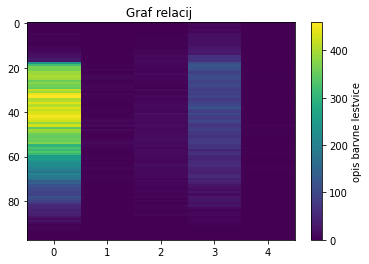

In [337]:
#pregled vizualni pregled nad vsemi atributi
fig, ax = plt.subplots() 


im = ax.imshow(tabelaRelacij, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf relacij ")